In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
from IPython.display import Image,display
%matplotlib inline


EXPLORE_DATA

In [2]:
train=pd.read_csv("H:\\DATA SETS\\titanic\\train.csv")
train.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [4]:
train.isnull()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False,False,False,True,False
887,False,False,False,False,False,False,False,False,False,False,False,False
888,False,False,False,False,False,True,False,False,False,False,True,False
889,False,False,False,False,False,False,False,False,False,False,False,False


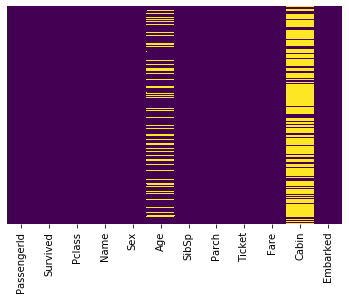

In [7]:
sns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap='viridis')
#yellow lines indicates missing information in the data

In [9]:
sns.set_style('whitegrid')

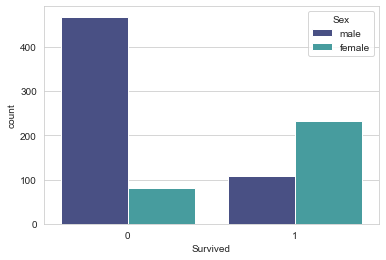

In [18]:
sns.countplot(x='Survived',data=train,hue='Sex',palette='mako')

#use different colors palette=stern_r, gist_yarg, gist_yarg_r, gnuplot, gnuplot2, gnuplot2_r, gnuplot_r, gray, gray_r, hot, hot_r, hsv, hsv_r, icefire, icefire_r, inferno, inferno_r, jet, jet_r, magma, magma_r, mako, mako_r, nipy_spectral, nipy_spectral_r, ocean, ocean_r, pink, pink_r, plasma, plasma_r, prism, prism_r, rainbow, rainbow_r, rocket, rocket_r, seismic, seismic_r, spring, spring_r, summer, summer_r, tab10, tab10_r, tab20, tab20_r, tab20b, tab20b_r, tab20c, tab20c_r, terrain, terrain_
#1=survived -->550+
#0=not survieved ---> 330+

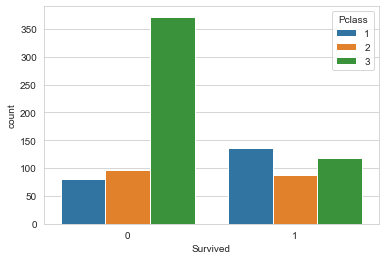

In [21]:
sns.countplot(x='Survived',data=train,hue='Pclass')


# 3rd class people not survuved mostly

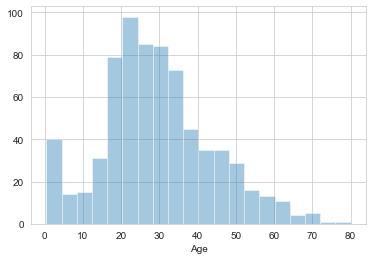

In [26]:
sns.distplot(train['Age'].dropna(),kde=False,bins=20)

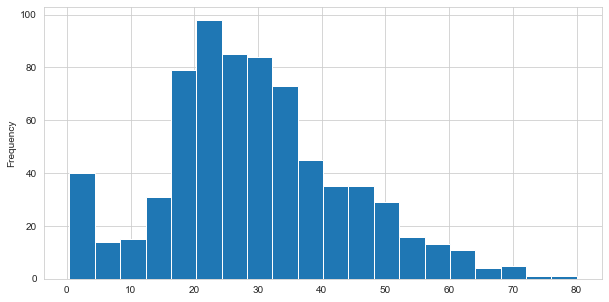

In [34]:
train['Age'].plot.hist(bins=20,figsize=(10,5))

In [30]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


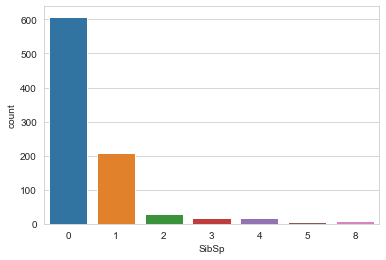

In [36]:
sns.countplot(x='SibSp',data=train)

# most of parents dont have child .i.e indicates in 0

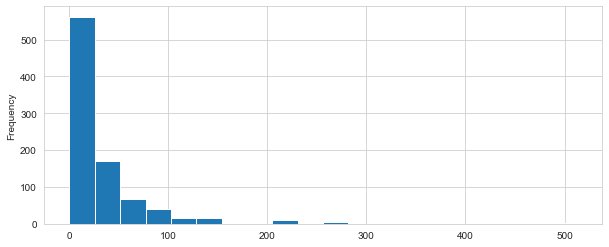

In [40]:
train['Fare'].plot.hist(bins=20,figsize=(10,4))

data cleaning

In [41]:
##imputation for age== instead of deleting we feed the average AGE data in missing values

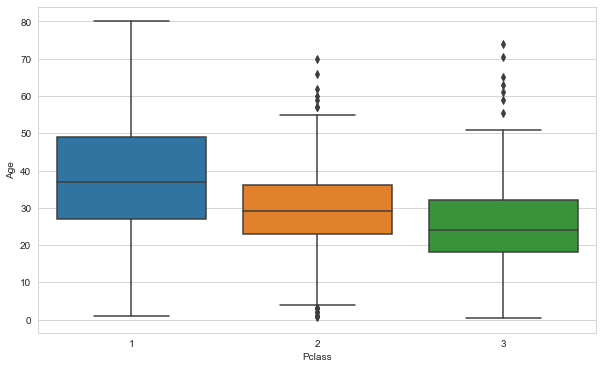

In [44]:
plt.figure(figsize=(10,6))
sns.boxplot(x='Pclass',y='Age',data=train)

In [52]:
def impute_a(cols):
    Age=cols[0]
    Pclass=cols[1]
    
    if pd.isnull(Age):
        if Pclass == 1:
            return 37
        elif Pclass == 2:
            return 28
        else:
            return 24
    else:
        return Age
    
    

In [58]:
train['Age']=train[['Age','Pclass']].apply(impute_a,axis=1)

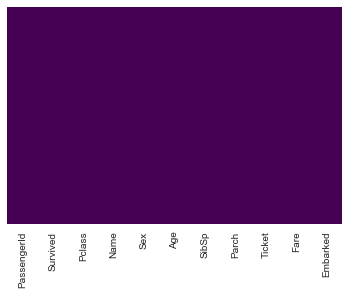

In [63]:
sns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [60]:
train.drop('Cabin',axis=1,inplace=True)

In [61]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [62]:
train.dropna(inplace=True)

In [64]:
pd.get_dummies(train['Sex'])

,female,male
0,0,1
1,1,0
2,1,0
3,1,0
4,0,1
...,...,...
886,0,1
887,1,0
888,1,0
889,0,1


In [70]:
sex=pd.get_dummies(train['Sex'],drop_first=True)

In [71]:
 embark=pd.get_dummies(train['Embarked'],drop_first=True)

In [85]:
train=pd.concat([train,sex,embark],axis=1)

In [86]:
train.head(2)

,Survived,Age,SibSp,Parch,Fare,male,Q,S,male,Q,S,1,2,3,4,5,6,male,Q,S
0,0,22.0,1,0,7.2500,1,0,1,1,0,1,0,0,0,0,0,0,1,0,1
1,1,38.0,1,0,71.2833,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
train.drop(['Sex','Embarked','PassengerId','Name','Pclass','Ticket'],axis=1,inplace=True)

In [89]:
train.head()

,Survived,Age,SibSp,Parch,Fare,male,Q,S,male,Q,S,1,2,3,4,5,6,male,Q,S
0,0,22.0,1,0,7.2500,1,0,1,1,0,1,0,0,0,0,0,0,1,0,1
1,1,38.0,1,0,71.2833,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1,26.0,0,0,7.9250,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1
3,1,35.0,1,0,53.1000,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1
4,0,35.0,0,0,8.0500,1,0,1,1,0,1,0,0,0,0,0,0,1,0,1


##part3 CREATE ML MODEL 

In [97]:
X=train.drop('Survived',axis=1)
y=train['Survived']

In [98]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_validate
from sklearn.model_selection import train_test_split

In [136]:

X_train, X_test, y_train, y_test = train_test_split(  X, y, test_size=0.33, random_state=11)

In [137]:
from sklearn.linear_model import LogisticRegression
logmodel=LogisticRegression()
logmodel.fit(X_train,y_train)

c:\users\smart\appdata\local\programs\python\python36\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [138]:
predictions=logmodel.predict(X_test)

In [139]:
from sklearn.metrics import classification_report

In [140]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.85      0.86      0.86       180
           1       0.78      0.76      0.77       114

    accuracy                           0.82       294
   macro avg       0.81      0.81      0.81       294
weighted avg       0.82      0.82      0.82       294



In [141]:
from sklearn.metrics import confusion_matrix

In [142]:
cm=confusion_matrix(y_test,predictions)
cm

array([[155,  25],
       [ 27,  87]], dtype=int64)

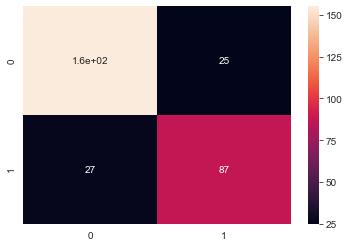

In [145]:
# 82.31% accuracy model
sns.heatmap(cm,annot=True)
plt.show()